In [17]:
import pandas as pd 
import json 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import xlsxwriter
from io import BytesIO




In [4]:
f = open('data/data2.json')

In [5]:
data = json.load(f)

In [21]:
l=[]
for i in range(1,100):
    try:
        l.append((data['KeyEvents']['event {}'.format(i)]['distance'],
                  data['KeyEvents']['event {}'.format(i)]['refl loss'],
                  data['KeyEvents']['event {}'.format(i)]['splice loss'],
                  data['KeyEvents']['event {}'.format(i)]['peak'],
                  data['KeyEvents']['event {}'.format(i)]['end of curr'],
                  data['KeyEvents']['event {}'.format(i)]['end of prev'],
                  data['KeyEvents']['event {}'.format(i)]['slope'],
                  data['KeyEvents']['event {}'.format(i)]['start of curr'],
                  data['KeyEvents']['event {}'.format(i)]['start of next'],
                  data['KeyEvents']['event {}'.format(i)]['type']))
    except:
        break
    

df = pd.DataFrame(l, columns =['distance','reflectionLoss','spliceLoss','peak','endOfCurr','endOfPrev','slope','startOfCurr','startOfNext','type'])
# df.to_excel('data1.xlsx',index=False)
df

,distance,reflectionLoss,spliceLoss,peak,endOfCurr,endOfPrev,slope,startOfCurr,startOfNext,type


In [22]:
writer = pd.ExcelWriter('data.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='Sheet1')
(max_row, max_col) = df.shape


writer.save()

In [24]:
workbook = xlsxwriter.Workbook('data.xlsx')
worksheet = workbook.add_worksheet('graphs')

filename = 'fig.jpg'

file = open(filename, 'rb')
data = BytesIO(file.read())
file.close()

worksheet.insert_image('C5', filename, {'image_data': data})

workbook.close()

In [7]:
out=[]
out.append((data['FxdParams']['date/time'][0:19],data['FxdParams']['wavelength'],data['FxdParams']['pulse width'],data['FxdParams']['range']))
df1=pd.DataFrame(out,columns=['date/time','wavelength','pulseWidth','range'])
df1

,date/time,wavelength,pulseWidth,range
0,Fri Jul 22 09:01:12,1301.8 nm,30 ns,2.501728


In [8]:
dist = df.distance.to_list()
refl = df.reflection_Loss.to_list()

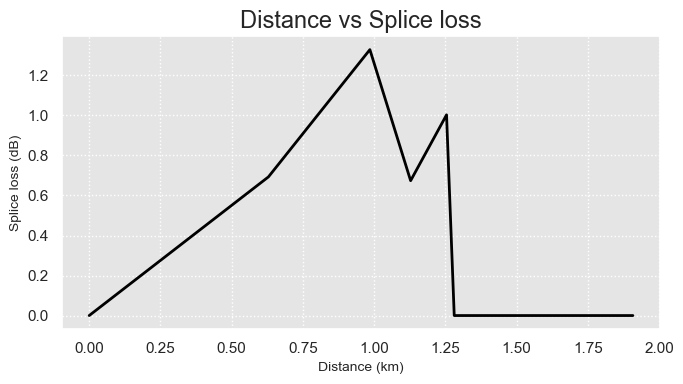

In [99]:
fig,ax=plt.subplots()
fig.set_size_inches(7,4)
fig.set_tight_layout('tight')
sns.set_theme()
sns.set(rc={'axes.facecolor':'#e5e5e5',
        'figure.facecolor':'#ffffff',
        'grid.color': '#ffffff','grid.linestyle':'dotted'})
x=df['distance'].to_list()
y=df['spliceLoss'].to_list()
x=[float(i) for i in x]
y=[float(i) for i in y]

ax.plot(x,y,'black',linewidth=2)
# ax.plot(x,y)

ax.set_xlabel('Distance (km)',fontsize=10)
ax.set_ylabel('Splice loss (dB)',fontsize=10)
ax.set_title('Distance vs Splice loss',fontsize=17)
plt.tight_layout()
plt.savefig('fig.jpg')
plt.show()